In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
	return pd.datetime.strptime(x, '%Y-%m')

In [ ]:
example = parser('1995-01')

example

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


datetime.datetime(1995, 1, 1, 0, 0)

In [ ]:
dataset = pd.read_csv('drive/My Drive/BCML/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [ ]:
dataset.head()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64

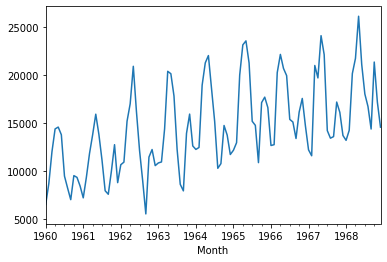

In [ ]:
# Jawaban 1 & 2
dataset.plot()
plt.show()

^ Dataset yang digunakan terdapat Trend dan Seasonality didalamnya karena grafik makin naik ke atas dan dalam rentang satu tahun terdapat pola yang konstan

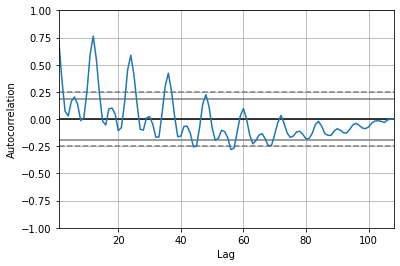

In [ ]:
pd.plotting.autocorrelation_plot(dataset)
plt.show()

p +- = 2

**ARIMA**

In [ ]:
# Jawaban 3
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(dataset, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  107
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1016.733
Method:                       css-mle   S.D. of innovations           3238.735
Date:                Thu, 17 Sep 2020   AIC                           2041.466
Time:                        05:17:46   BIC                           2052.157
Sample:                    02-01-1960   HQIC                          2045.800
                         - 12-01-1968                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            76.5216    324.843      0.236      0.814    -560.158     713.201
ar.L1.D.Sales     0.1764      0.096      1.845      0.068      -0.011       0.364
ar.L2.D.Sales    -0.1413      0.096     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


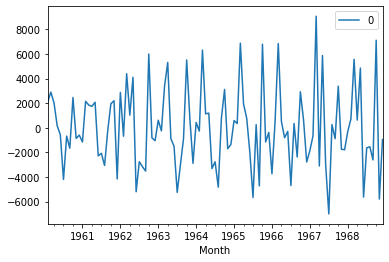

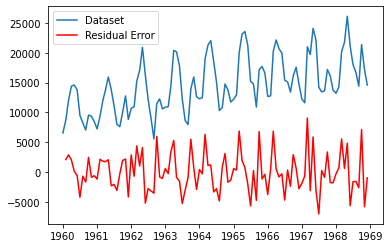

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

plt.plot(dataset)
plt.plot(residuals,  color='red')
plt.legend(['Dataset','Residual Error'])

In [ ]:
residuals

,0
Month,
1960-02-01,2101.478425
1960-03-01,2896.654509
1960-04-01,2021.045329
1960-05-01,166.129828
1960-06-01,-569.067200
...,...
1968-08-01,-1544.435068
1968-09-01,-2613.397077
1968-10-01,7111.507128


In [ ]:
print(residuals.describe())

                 0
count   107.000000
mean      3.694041
std    3254.493956
min   -7000.877106
25%   -2038.157156
50%    -303.267287
75%    1940.369505
max    9059.576217


In [ ]:
values = dataset.values
size = int(len(values) * 0.66)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	prediction = output[0]
	predictions.append(prediction)
	expected = test[t]
	history.append(expected)
	print('predicted=%f, expected=%f' % (prediction, expected))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=16933.491189, expected=16611.000000
predicted=16296.535773, expected=12674.000000
predicted=11696.551581, expected=12760.000000
predicted=13564.033036, expected=20249.000000
predicted=22782.443466, expected=22135.000000
predicted=21269.506348, expected=20677.000000
predicted=19959.972907, expected=19933.000000
predicted=20179.569954, expected=15388.000000
predicted=14206.021597, expected=15113.000000
predicted=16097.102487, expected=13401.000000
predicted=12999.404503, expected=16135.000000
predicted=17396.351292, expected=17562.000000
predicted=17565.293495, expected=14720.000000
predicted=13658.774753, expected=12225.000000
predicted=12121.199447, expected=11608.000000
predicted=11989.999319, expected=20985.000000
predicted=24143.379985, expected=19692.000000
predicted=17422.787867, expected=24081.000000
predicted=25463.326627, expected=22114.000000
predicted=21245.462669, expected=14220.000000
predicted=12777.364854, expected=13434.000000
predicted=14705.647789, expected=1

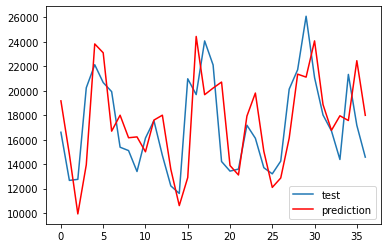

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [ ]:
# Grid Search
# Courtesy of Jason Brownlee of Machine Learning Mastery
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = measure_rmse(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=4884.693
ARIMA(0, 0, 1) RMSE=3724.467
ARIMA(0, 1, 0) RMSE=3679.761
ARIMA(0, 1, 1) RMSE=3761.112
ARIMA(0, 1, 2) RMSE=3910.910
ARIMA(0, 2, 0) RMSE=5163.372
ARIMA(0, 2, 1) RMSE=3737.469
ARIMA(0, 2, 2) RMSE=3817.453
ARIMA(1, 0, 0) RMSE=3423.991
ARIMA(1, 0, 1) RMSE=3434.996
ARIMA(1, 0, 2) RMSE=3374.874
ARIMA(1, 1, 0) RMSE=3763.615
ARIMA(1, 2, 0) RMSE=4769.492
ARIMA(2, 0, 0) RMSE=3464.027
ARIMA(2, 0, 2) RMSE=3546.436
ARIMA(2, 1, 0) RMSE=3782.063
ARIMA(2, 2, 0) RMSE=4766.062
ARIMA(3, 0, 0) RMSE=3482.534
ARIMA(3, 1, 0) RMSE=3563.175
ARIMA(3, 2, 0) RMSE=4695.399
ARIMA(4, 0, 0) RMSE=3410.553
ARIMA(4, 1, 0) RMSE=3374.470
ARIMA(4, 2, 0) RMSE=3679.768
ARIMA(5, 0, 0) RMSE=3309.820
ARIMA(5, 1, 0) RMSE=3283.034
ARIMA(5, 2, 0) RMSE=3712.811
ARIMA(6, 0, 0) RMSE=3161.306
ARIMA(6, 1, 0) RMSE=3289.223
ARIMA(6, 2, 0) RMSE=3684.903
ARIMA(7, 0, 0) RMSE=3226.737
ARIMA(7, 1, 0) RMSE=3443.141
ARIMA(7, 2, 0) RMSE=3640.939
ARIMA(8, 0, 0) RMSE=3294.552
ARIMA(8, 1, 0) RMSE=3151.054
ARIMA(8, 2, 0)

**SARIMA**

In [ ]:
# Jawaban 4
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = 12

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(dataset, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 18608.652
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'n']] 9928.438
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'n']] 3798.000
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'n']] 7278.585
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 3942.265
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'n']] 3852.155
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'n']] 3924.991
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'n']] 3949.171
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 5399.238
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'c']] 4061.377
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'n']] 3440.470
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'c']] 4130.492
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'c']] 3502.309
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'c']] 3816.618
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'c']] 3478.543
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'c']] 4094.032
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'c']] 3493.332
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 6760.052
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'c']] 3378.390
 > Model[[(0, 0, 0), (0, 0, 1, 0), 't']] 4512.298

**Jawaban** **5**

ARIMA : (9, 0, 0) RMSE=3082.733

Untuk ARIMA terbaik menggunakan hyperparameter p (Autocorrelation) = 9, d(Integrated) = 0, q(Moving Average) = 0

SARIMA : [(2, 1, 2), (2, 0, 2, 0), 'c'] RMSE : 2578.9128680665303

Untuk SARIMA terbaik menggunakan hyperparameter p (Autocorrelation)= 2, 
d (Integrated)= 1, 
q (Moving Average)= 2, 

P (Seasonal autoregressive order)= 2, 

D (Seasonal difference order)= 0, 

Q (Seasonal moving average order)= 2, 

m (Time steps untuk sebuah seasonal period)= 0 dan 

t(Trend) = 'c' (Constant)